# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Ingest Data  

In [2]:
df = pd.read_excel("World military power.xlsx", header=1)
df

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0
5,Armenia,2.1251,Armenia,64,Armenia,0,Armenia,9,Armenia,3,Armenia,13,Armenia,37,Armenia,20,Armenia,110,Armenia,748,Armenia,38,Armenia,150,Armenia,68,Armen

# EDA

## Implement basic steps to see how is your data looks like

In [3]:
df.shape

(138, 60)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

## Convert multi index columns to one level

In [5]:
drop_columns = df.columns[2::2]

In [6]:
df.drop(drop_columns, inplace=True,axis=1)
df

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0
5,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.0,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570.0
6,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.0,6.0,2.0,8.0,"26,30,00,00,000","17,14,00,00,00,000",480,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760,2000,NaN
7,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.0,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524.0
8,Azerbaijan,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31.0,0.0,4.0,0.0,1.0,"2,80,50,00,000","17,41,00,00,000",37,"7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600,713,0,2468.0
9,Bahrain,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39.0,0.0,0.0,0.0,1.0,"1,41,50,00,000","52,15,00,00,000",4,45000,55000,"12,46,00,000","8,06,505","14,22,659",760,161,0,NaN


## Detect and drop duplicated columns

In [7]:
df[df.duplicated()]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value


## Check for missing values 

In [8]:
df.isnull().sum()

Military Strength                           0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [9]:
pd.set_option('display.max_rows', 140)

In [10]:
df[["Military Strength","Navy Fleet Strengths value"]] # Donanma Filosunun Güçlü Yönleri değeri

,Military Strength,Navy Fleet Strengths value
0,Afghanistan,0.0
1,Albania,38.0
2,Algeria,201.0
3,Angola,57.0
4,Argentina,49.0
5,Armenia,0.0
6,Australia,48.0
7,Austria,0.0
8,Azerbaijan,31.0
9,Bahrain,39.0


In [11]:
df[["Military Strength","Aircraft Carrier Fleet Strength value"]] # Uçak Gemisi Filo Gücü değeri

,Military Strength,Aircraft Carrier Fleet Strength value
0,Afghanistan,0.0
1,Albania,0.0
2,Algeria,0.0
3,Angola,0.0
4,Argentina,0.0
5,Armenia,NaN
6,Australia,2.0
7,Austria,NaN
8,Azerbaijan,0.0
9,Bahrain,0.0


In [12]:
df[["Military Strength","Submarine Fleet Strength value"]] # Denizaltı Filo Mukavemet değeri

,Military Strength,Submarine Fleet Strength value
0,Afghanistan,0.0
1,Albania,0.0
2,Algeria,6.0
3,Angola,0.0
4,Argentina,2.0
5,Armenia,NaN
6,Australia,6.0
7,Austria,NaN
8,Azerbaijan,4.0
9,Bahrain,0.0


In [13]:
df[["Military Strength","Destroyer Fleet Strength value"]] # Muharip Filo Gücü değeri

,Military Strength,Destroyer Fleet Strength value
0,Afghanistan,0.0
1,Albania,0.0
2,Algeria,0.0
3,Angola,0.0
4,Argentina,4.0
5,Armenia,NaN
6,Australia,2.0
7,Austria,NaN
8,Azerbaijan,0.0
9,Bahrain,0.0


In [14]:
df[["Military Strength","Frigate Fleet Strength value"]] # Fırkateyn Filo Mukavemet değeri

,Military Strength,Frigate Fleet Strength value
0,Afghanistan,0.0
1,Albania,0.0
2,Algeria,5.0
3,Angola,0.0
4,Argentina,0.0
5,Armenia,NaN
6,Australia,8.0
7,Austria,NaN
8,Azerbaijan,1.0
9,Bahrain,1.0


In [15]:
df[["Military Strength","Total Coastline Coverage value"]] # Toplam Kıyı Şeridi Kapsama değeri

,Military Strength,Total Coastline Coverage value
0,Afghanistan,0
1,Albania,362
2,Algeria,998
3,Angola,1600
4,Argentina,4989
5,Armenia,NaN
6,Australia,25760
7,Austria,NaN
8,Azerbaijan,713
9,Bahrain,161


In [16]:
df[["Military Strength","Total Border Coverage value"]]  # Toplam Sınır Kapsama değeri

,Military Strength,Total Border Coverage value
0,Afghanistan,5987.0
1,Albania,691.0
2,Algeria,6734.0
3,Angola,5369.0
4,Argentina,11968.0
5,Armenia,1570.0
6,Australia,NaN
7,Austria,2524.0
8,Azerbaijan,2468.0
9,Bahrain,NaN


In [17]:
df[["Military Strength","Navy Fleet Strengths value","Aircraft Carrier Fleet Strength value","Submarine Fleet Strength value","Destroyer Fleet Strength value","Frigate Fleet Strength value","Total Coastline Coverage value"]]=df[["Military Strength","Navy Fleet Strengths value","Aircraft Carrier Fleet Strength value","Submarine Fleet Strength value","Destroyer Fleet Strength value","Frigate Fleet Strength value","Total Coastline Coverage value"]].fillna(value=0)

In [18]:
df[["Military Strength","Total Border Coverage value"]] = df[["Military Strength","Total Border Coverage value"]].fillna(value=0)

In [19]:
df.isnull().sum()

Military Strength                          0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

In [20]:
df.shape

(138, 31)

## Fix the dtypes

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [22]:
df.select_dtypes("object").index

RangeIndex(start=0, stop=138, step=1)

In [23]:
df["Total Coastline Coverage value"] = [item.replace(",","") if type(item) == str else item for item in df["Total Coastline Coverage value"]]

In [24]:
for i in df.select_dtypes("object").columns[1:]:
    df[i] = [item.replace(",","") if type(item) == str else item for item in df[i]]
    df[i] = df[i].astype(float)

In [25]:
for i in df.columns[1:] :
    for j in df.index :
        if type(df[i][j]) == str :
            df[i][j] = df[i][j].replace(",","")
    df[i] = df[i].astype("float")        

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [27]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [28]:
df["Military Strength Power Index"] = [round(i,1) if type(i) == float else i for i in df["Military Strength Power Index"]]

In [29]:
df

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000.0,2840000000.0,43.0,0.0,5500.0,0.0,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
1,Albania,2.3,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000.0,9505000000.0,4.0,16000.0,42500.0,168300000.0,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
2,Algeria,0.5,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000.0,6260000000.0,157.0,1306000.0,325000.0,12200000000.0,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
3,Angola,0.8,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000.0,42080000000.0,176.0,1666000.0,82300.0,8273000000.0,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
4,Argentina,0.7,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000.0,214900000000.0,1138.0,479400.0,685000.0,2185000000.0,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0
5,Armenia,2.1,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,1385000000.0,10410000000.0,11.0,0.0,47500.0,0.0,1696085.0,3038217.0,29743.0,0.0,0.0,1570.0
6,Australia,0.3,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,26300000000.0,1714000000000.0,480.0,263000.0,1005000.0,1821000000.0,10808002.0,23470145.0,7741220.0,25760.0,2000.0,0.0
7,Austria,1.0,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3380000000.0,630800000000.0,52.0,14260.0,215000.0,43000000.0,4017691.0,8793370.0,83871.0,0.0,0.0,2524.0
8,Azerbaijan,0.9,147.0,17.0,12.0,1.0,29.0,88.0,17.0,570.0,1451.0,187.0,227.0,162.0,31.0,0.0,4.0,0.0,1.0,2805000000.0,17410000000.0,37.0,789300.0,180000.0,7000000000.0,5042346.0,10046516.0,86600.0,713.0,0.0,2468.0
9,Bahrain,1.9,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,843.0,33.0,26.0,17.0,39.0,0.0,0.0,0.0,1.0,1415000000.0,52150000000.0,4.0,45000.0,55000.0,124600000.0,806505.0,1422659.0,760.0,161.0,0.0,0.0


## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [30]:
df.columns

Index(['Military Strength', 'Military Strength Power Index', 'Aircraft Strength value', 'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value', 'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength value', 'Tank Strength value', 'AFV/APC Strength value', 'Self-Propelled Artillery Strength value', 'Towed Artillery Strength value', 'Rocket Projector Strength value', 'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'defense spending budget value', 'External Debt value', 'Airport Totals value', 'Oil Production value', 'Oil Consumption value', 'Proven Oil Reserves value', 'Available Manpower value', 'Total Population value', 'Total Square Land Area value', 'Total Coastline Coverage value', 'Total Waterway Coverage value', 'Total Border Coverage value'], dtype='object

In [31]:
df.drop( columns=["Proven Oil Reserves value","Oil Consumption value","Oil Production value","Airport Totals value","External Debt value"], axis=1, inplace=True)

In [32]:
df.shape

(138, 26)

## Visualy inspect the some features

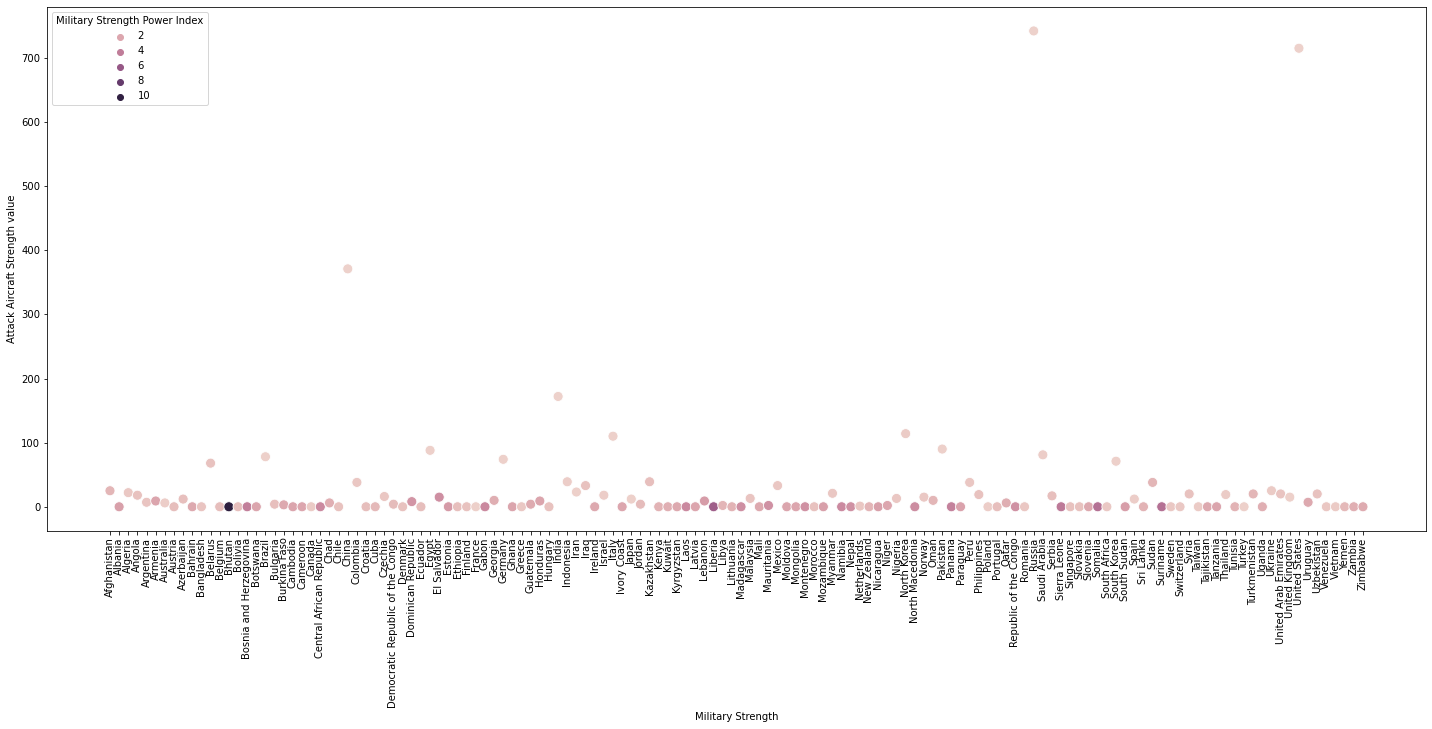

In [33]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x=df["Military Strength"], y=df["Attack Aircraft Strength value"],s=100,hue="Military Strength Power Index")
plt.tight_layout()
plt.xticks(rotation = 90);

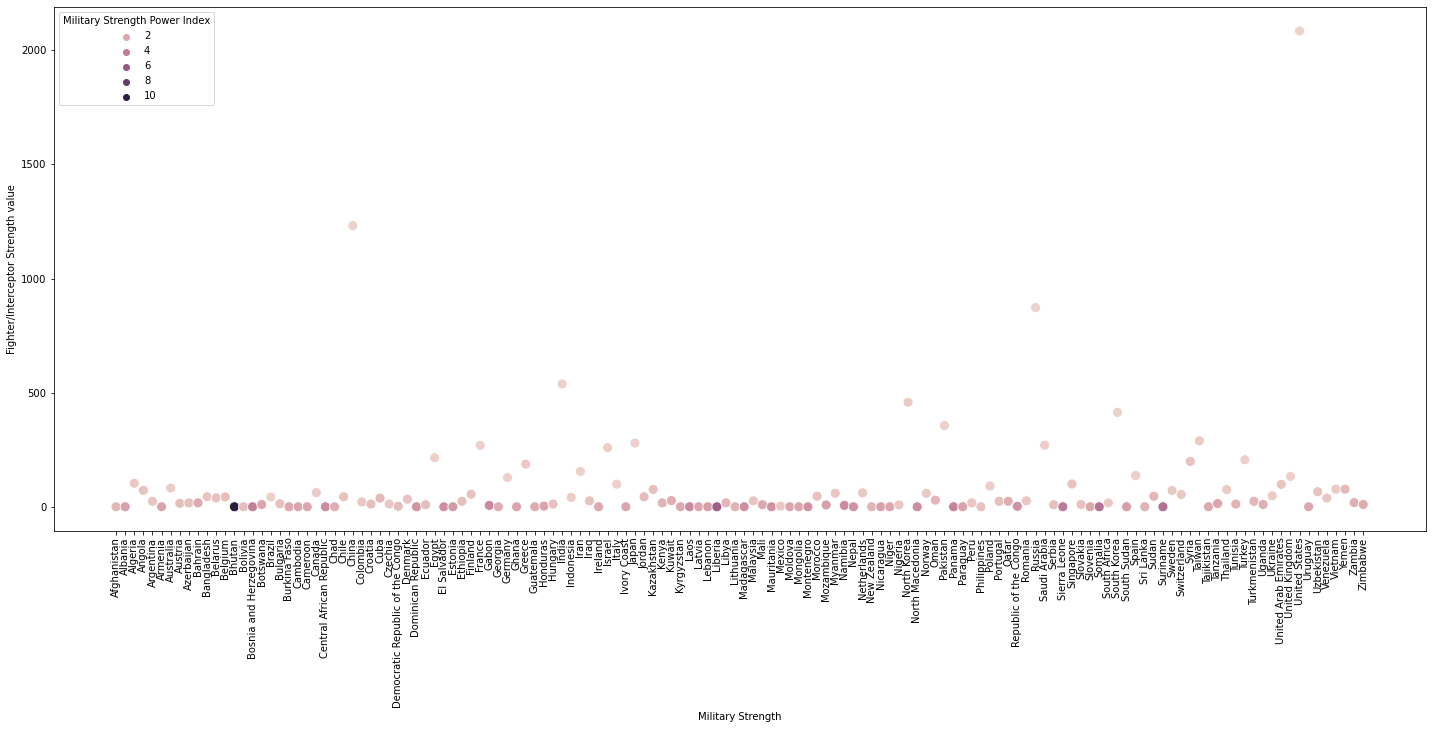

In [34]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x=df["Military Strength"], y=df["Fighter/Interceptor Strength value"],s=100,hue="Military Strength Power Index")
plt.tight_layout()
plt.xticks(rotation = 90);

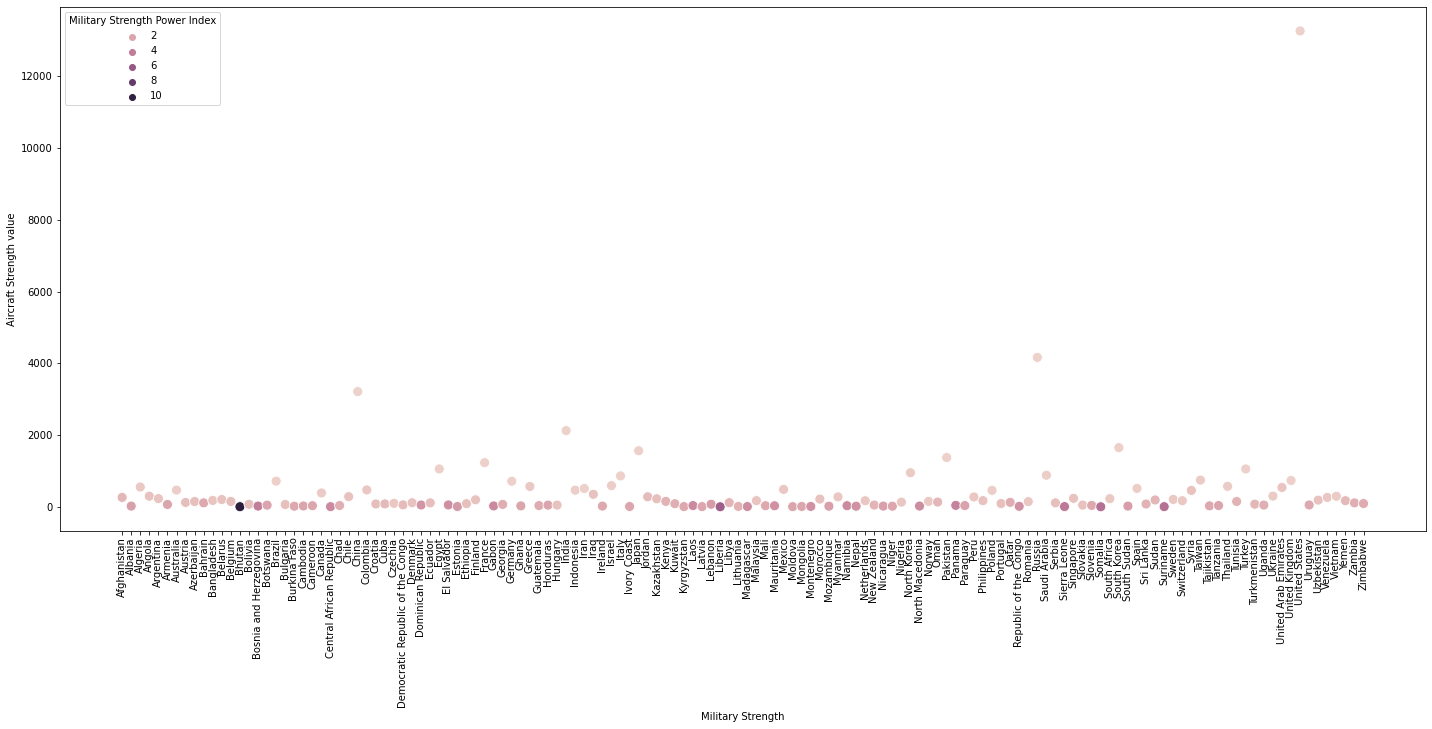

In [35]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x=df["Military Strength"], y=df["Aircraft Strength value"],s=100,hue="Military Strength Power Index")
plt.tight_layout()
plt.xticks(rotation = 90);

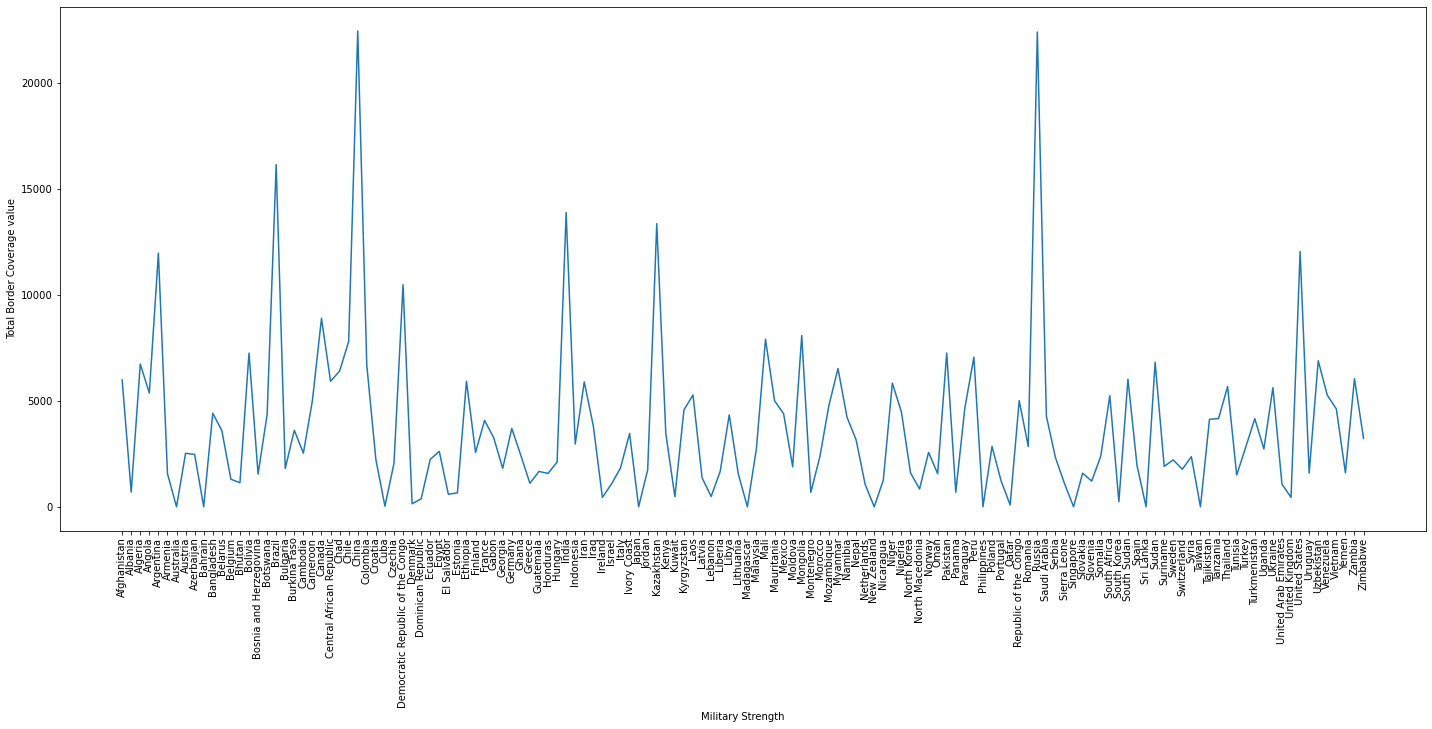

In [36]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x=df["Military Strength"], y=df["Total Border Coverage value"])
plt.tight_layout()
plt.xticks(rotation = 90);

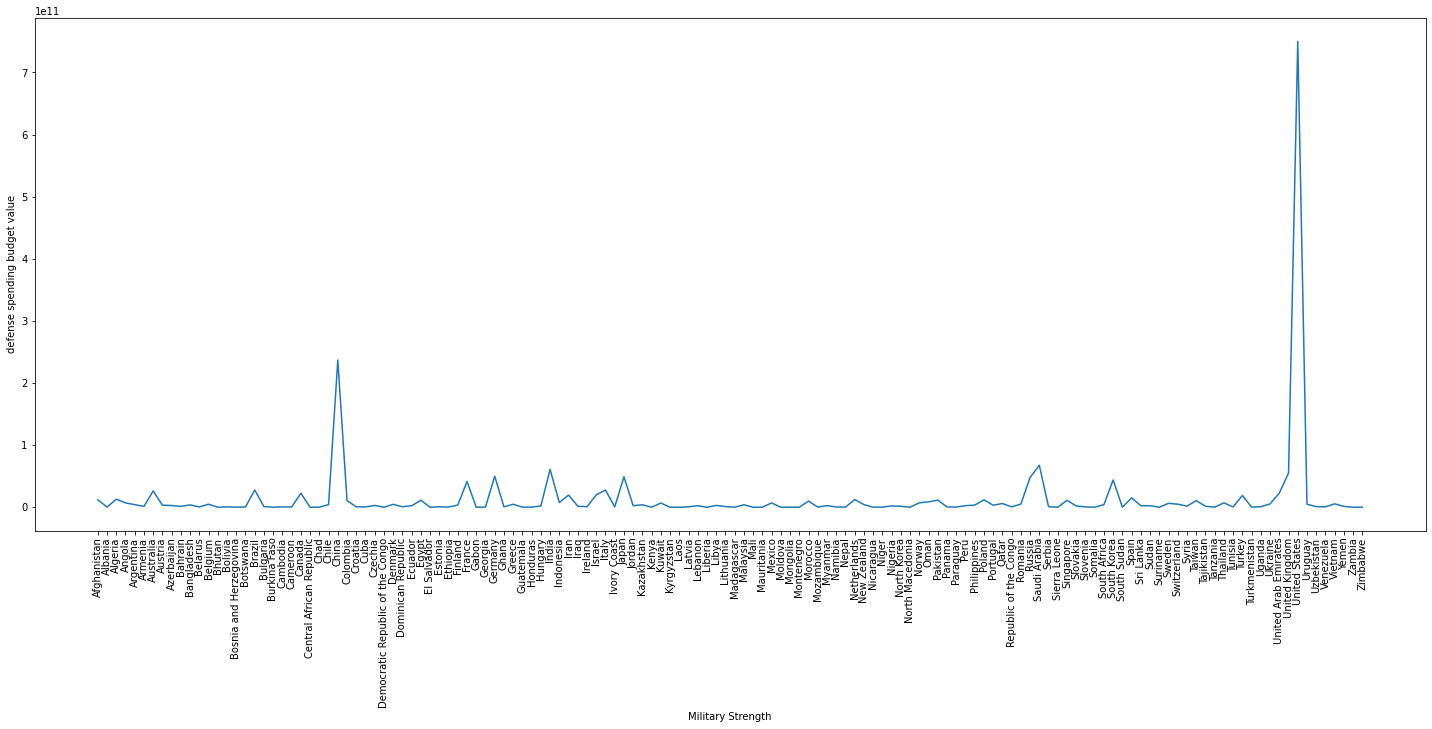

In [37]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x=df["Military Strength"], y=df["defense spending budget value"])
plt.tight_layout()
plt.xticks(rotation = 90);

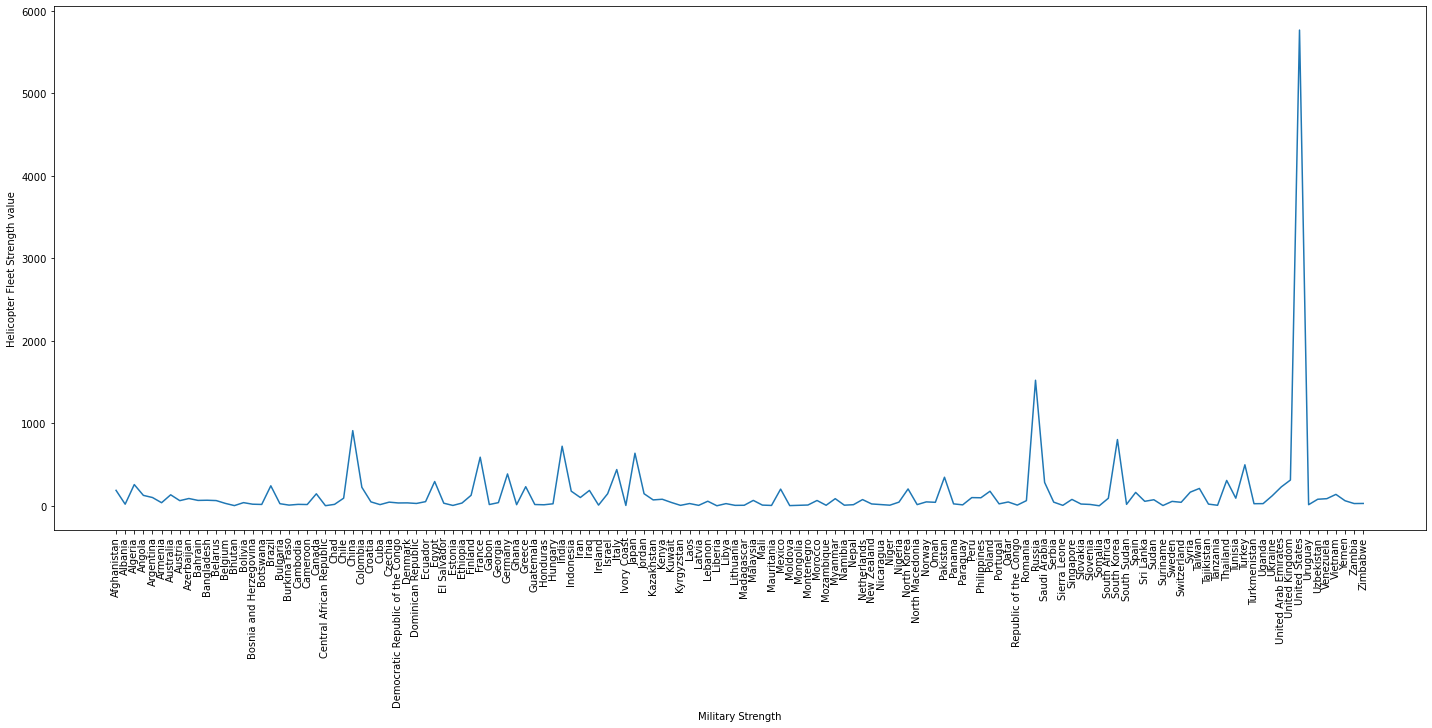

In [38]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x=df["Military Strength"], y=df["Helicopter Fleet Strength value"])
plt.tight_layout()
plt.xticks(rotation = 90);

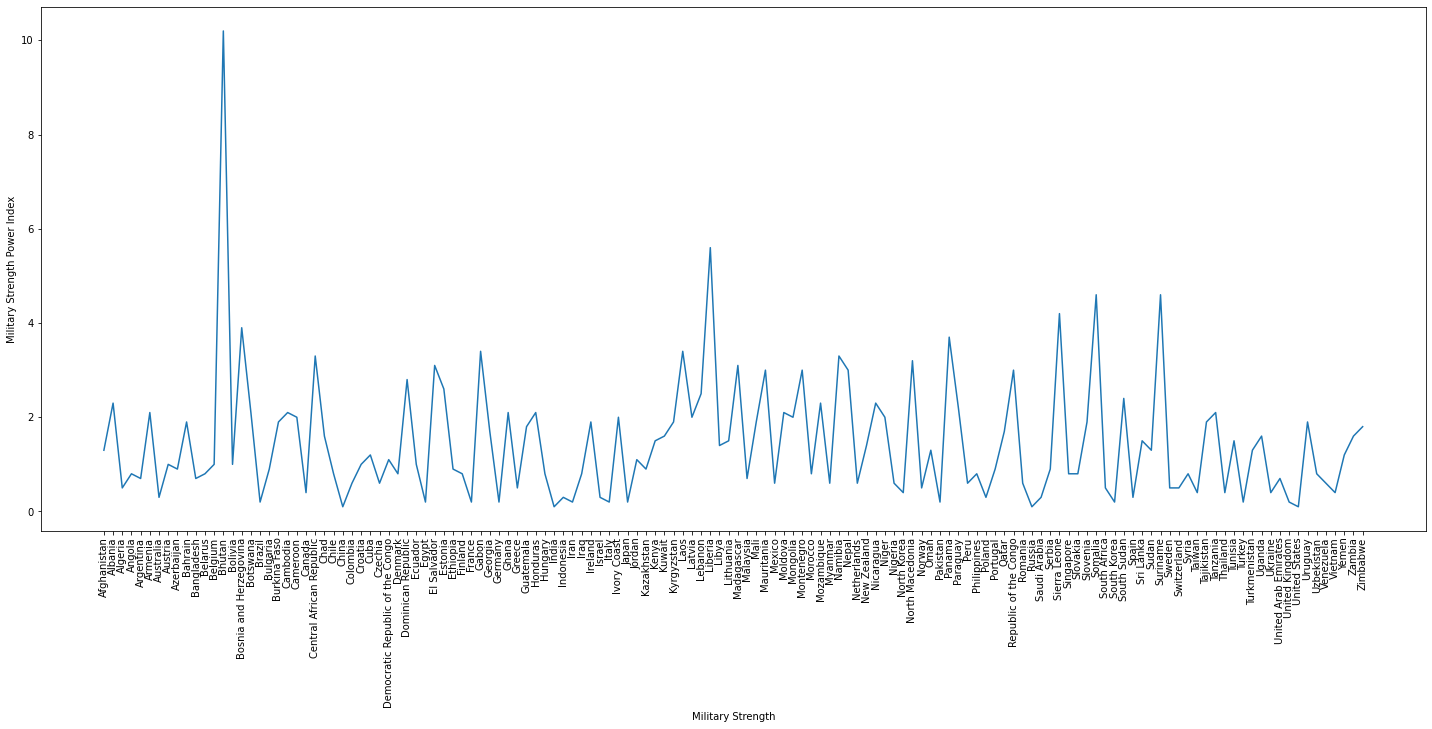

In [39]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x=df["Military Strength"], y=df["Military Strength Power Index"])
plt.tight_layout()
plt.xticks(rotation = 90);

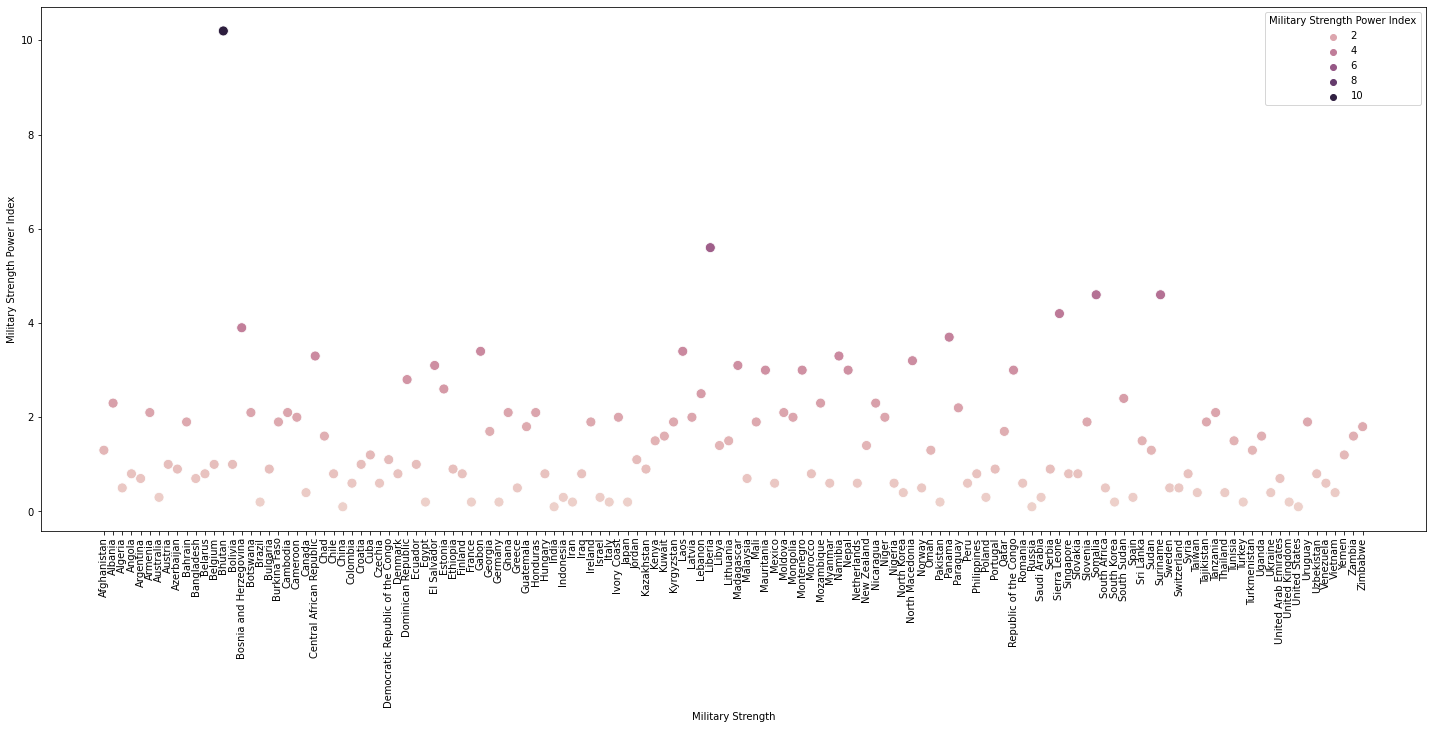

In [40]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x=df["Military Strength"], y=df["Military Strength Power Index"],s=100,hue="Military Strength Power Index")
plt.tight_layout()
plt.xticks(rotation = 90);

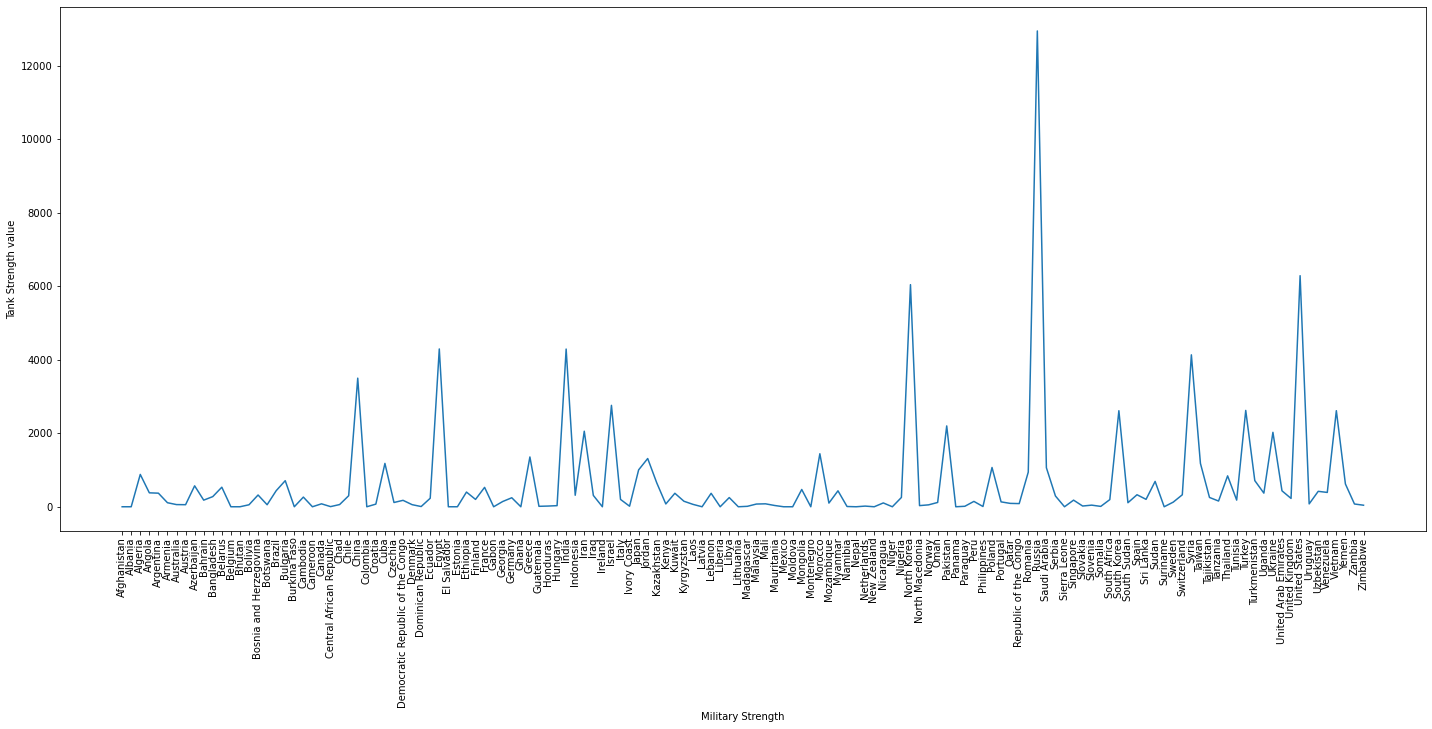

In [41]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x=df["Military Strength"], y=df["Tank Strength value"])
plt.tight_layout()
plt.xticks(rotation = 90);

## Decriptive statistics

In [42]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
count,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0
mean,1.5,388.5,81.6,25.8,30.2,82.8,154.1,25.6,646.6,2485.7,212.2,394.0,156.9,76.4,0.3,4.0,1.7,2.9,13993631641.2,25442969.9,53180584.7,954674.6,4874.5,5464.1,3705.7
std,1.3,1232.0,230.3,94.5,92.3,240.8,520.2,97.3,1515.5,5410.5,688.0,805.8,484.4,140.8,1.8,12.6,9.2,6.1,67311892724.1,84506975.3,165108987.4,2225570.5,18603.3,16494.5,3764.9
min,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13000000.0,132740.0,597927.0,697.0,0.0,0.0,0.0
25%,0.6,33.0,0.0,0.0,3.0,4.2,15.2,0.0,19.2,250.2,0.0,24.2,0.0,5.2,0.0,0.0,0.0,0.0,325500000.0,2618384.5,5819450.5,84553.2,49.8,0.0,1401.2
50%,1.0,111.0,17.0,0.0,9.0,26.0,44.0,2.0,153.0,734.5,23.0,108.0,24.0,30.0,0.0,0.0,0.0,0.0,2100908787.5,5986089.0,16139097.5,305420.0,793.0,875.0,2564.5
75%,2.0,290.2,60.5,15.8,26.0,79.2,126.8,17.8,436.2,2000.0,97.2,296.5,99.8,72.8,0.0,2.0,0.0,4.0,6957750000.0,17567075.0,40688865.8,792961.8,2746.5,3050.0,5015.5
max,10.2,13264.0,2085.0,742.0,945.0,2643.0,5768.0,967.0,12950.0,39253.0,6083.0,4465.0,3860.0,984.0,20.0,83.0,91.0,52.0,750000000000.0,752855402.0,1384688986.0,17098242.0,202080.0,110000.0,22457.0


# Data Preprocessing

In [43]:
df2 = df.copy()

In [44]:
df.drop(columns="Military Strength",axis=1,inplace=True)

In [45]:
df.shape

(138, 25)

In [46]:
df.sample()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
47,2.1,46.0,3.0,9.0,11.0,10.0,12.0,0.0,19.0,92.0,0.0,176.0,0.0,59.0,0.0,0.0,0.0,0.0,205000000.0,4104696.0,9182766.0,112090.0,832.0,465.0,1575.0


# Modelling

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [48]:
scaler = StandardScaler()

In [49]:
scaler_df = scaler.fit_transform(df)

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [50]:
from pyclustertend import hopkins

In [51]:
hopkins(df, df.shape[0])

0.05902701777719386

In [52]:
hopkins(MinMaxScaler().fit_transform(df), df.shape[0])

0.08992912272042997

## Clustering with K-means

In [53]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=3, random_state=42)

In [54]:
K_means_model.fit_predict(scaler_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1])

In [55]:
df["Classes"] = K_means_model.labels_

In [56]:
df.sample(25)

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Classes
85,2.0,16.0,0.0,2.0,5.0,0.0,7.0,1.0,0.0,182.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,325000000.0,6754519.0,19866231.0,1267000.0,0.0,300.0,5834.0,1
22,0.4,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,1973.0,0.0,133.0,0.0,64.0,0.0,4.0,0.0,12.0,22500000000.0,16110865.0,35881659.0,9984670.0,202080.0,636.0,8893.0,1
41,3.4,23.0,6.0,0.0,2.0,0.0,15.0,0.0,0.0,70.0,0.0,16.0,0.0,10.0,0.0,0.0,0.0,0.0,83000000.0,842741.0,2119036.0,267667.0,885.0,1600.0,3261.0,1
52,0.8,348.0,26.0,33.0,16.0,102.0,186.0,40.0,309.0,4739.0,44.0,120.0,30.0,60.0,0.0,0.0,0.0,0.0,1730000000.0,16399240.0,40194216.0,438317.0,58.0,5279.0,3809.0,1
29,1.2,80.0,38.0,0.0,2.0,26.0,14.0,4.0,1180.0,670.0,100.0,150.0,100.0,12.0,0.0,0.0,0.0,2.0,500000000.0,5980621.0,11116396.0,110860.0,3735.0,240.0,29.0,1
4,0.7,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000.0,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,1
128,0.7,538.0,98.0,20.0,40.0,145.0,229.0,30.0,434.0,8691.0,183.0,76.0,72.0,75.0,0.0,0.0,0.0,0.0,22755000000.0,5820789.0,9701315.0,83600.0,1318.0,0.0,1066.0,1
72,3.0,28.0,0.0,2.0,6.0,9.0,4.0,0.0,35.0,95.0,0.0,224.0,0.0,5.0,0.0,0.0,0.0,0.0,50250000.0,1555374.0,3840429.0,1030700.0,754.0,0.0,5002.0,1
67,1.4,114.0,17.0,2.0,4.0,62.0,26.0,7.0,250.0,450.0,50.0,100.0,55.0,5.0,0.0,0.0,0.0,1.0,3000000000.0,3552871.0,6754507.0,1759540.0,1770.0,0.0,4339.0,1
93,2.2,33.0,0.0,0.0,6.0,15.0,11.0,0.0,13.0,63.0,0.0,108.0,0.0,40.0,0.0,0.0,0.0,0.0,250000000.0,3372366.0,7025763.0,406752.0,0.0,3100.0,4655.0,1


### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [57]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters = k, random_state=42)
    model.fit(scaler_df)
    ssd.append(model.inertia_)

### Model Building and label visualisation

Text(0.5, 1.0, 'elbow method')

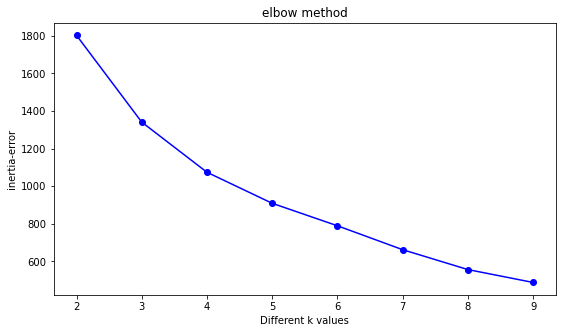

In [58]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [59]:
ssd

[1801.9536199653583,
 1340.5994418529046,
 1074.025882722054,
 908.920064143847,
 789.4833632022547,
 662.340827759704,
 556.5625812593566,
 488.0879201627994]

In [60]:
pd.Series(ssd).diff()

0      NaN
1   -461.4
2   -266.6
3   -165.1
4   -119.4
5   -127.1
6   -105.8
7    -68.5
dtype: float64

In [61]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,461.4
3,266.6
4,165.1
5,119.4
6,127.1
7,105.8
8,68.5


<AxesSubplot:>

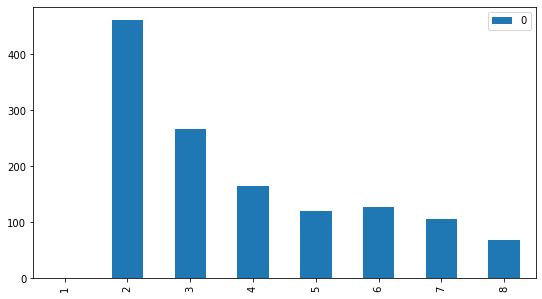

In [62]:
df_diff.plot(kind='bar')

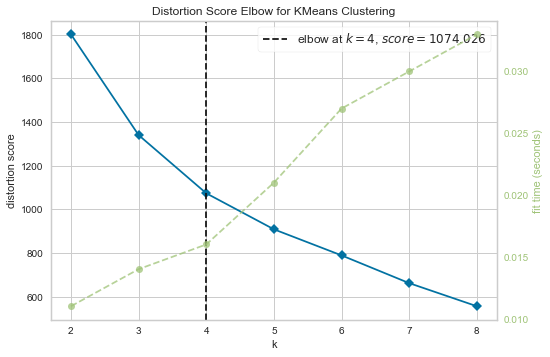

In [63]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(scaler_df)        # Fit the data to the visualizer
visualizer.show();

### Silhouette

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_score(scaler_df, K_means_model.labels_)

0.8221037329225278

In [66]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaler_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(scaler_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8607923270188153
For n_clusters=3, the silhouette score is 0.8221037329225278
For n_clusters=4, the silhouette score is 0.47928513551391383
For n_clusters=5, the silhouette score is 0.4546096674563028
For n_clusters=6, the silhouette score is 0.4659743575200932
For n_clusters=7, the silhouette score is 0.45646743767544734
For n_clusters=8, the silhouette score is 0.39679747096698237


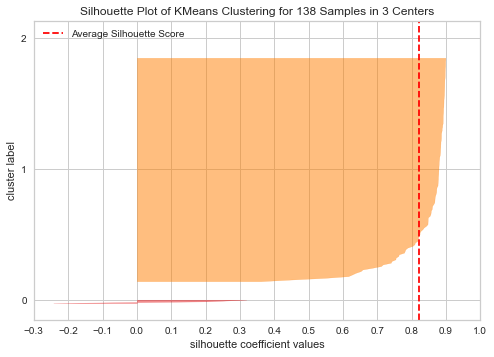

In [67]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaler_df)    # Fit the data to the visualizer
visualizer.poof();

In [68]:
df["labels"] = df2["Military Strength"]

In [69]:
df[df.Classes == 0]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Classes,labels
26,0.1,3210.0,1232.0,371.0,224.0,314.0,911.0,281.0,3500.0,33000.0,3800.0,3600.0,2650.0,777.0,2.0,74.0,36.0,52.0,237000000000.0,752855402.0,1384688986.0,9596961.0,14500.0,110000.0,22457.0,0,China
49,0.1,2123.0,538.0,172.0,250.0,359.0,722.0,23.0,4292.0,8686.0,235.0,4060.0,266.0,285.0,1.0,16.0,10.0,13.0,61000000000.0,622480340.0,1296834042.0,3287263.0,7000.0,14500.0,13888.0,0,India
101,0.1,4163.0,873.0,742.0,424.0,497.0,1522.0,531.0,12950.0,27038.0,6083.0,4465.0,3860.0,603.0,1.0,62.0,16.0,10.0,48000000000.0,69640160.0,142122776.0,17098242.0,37653.0,102000.0,22408.0,0,Russia


In [70]:
df[df.Classes == 2]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Classes,labels
130,0.1,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,39253.0,1465.0,2740.0,1366.0,490.0,20.0,66.0,91.0,0.0,750000000000.0,144872845.0,329256465.0,9826675.0,19924.0,41009.0,12048.0,2,United States


In [71]:
#for col in df.columns:
#    plt.figure(figsize = (22,6))
#    sns.barplot(y = df[col], x = df.labels, data = df)
#    plt.xticks(rotation = 45);

### Drop USA China Russia

In [72]:
df.drop(index=[26,101,130], axis=0, inplace=True) # USA, Russia ve China değerlerini Outliers olarak değerlendirdim

In [89]:
df.reset_index(drop=True)

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Classes,labels
0,1.3,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000.0,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,1,Afghanistan
1,2.3,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000.0,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,1,Albania
2,0.5,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000.0,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,1,Algeria
3,0.8,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000.0,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,1,Angola
4,0.7,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000.0,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,1,Argentina
5,2.1,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,1385000000.0,1696085.0,3038217.0,29743.0,0.0,0.0,1570.0,1,Armenia
6,0.3,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,26300000000.0,10808002.0,23470145.0,7741220.0,25760.0,2000.0,0.0,1,Australia
7,1.0,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3380000000.0,4017691.0,8793370.0,83871.0,0.0,0.0,2524.0,1,Austria
8,0.9,147.0,17.0,12.0,1.0,29.0,88.0,17.0,570.0,1451.0,187.0,227.0,162.0,31.0,0.0,4.0,0.0,1.0,2805000000.0,5042346.0,10046516.0,86600.0,713.0,0.0,2468.0,1,Azerbaijan
9,1.9,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,843.0,33.0,26.0,17.0,39.0,0.0,0.0,0.0,1.0,1415000000.0,806505.0,1422659.0,760.0,161.0,0.0,0.0,1,Bahrain


In [93]:
df.drop(columns="labels", axis=1, inplace=True)

In [74]:
df.shape

(135, 26)

In [75]:
df.sample()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Classes
46,1.8,33.0,0.0,4.0,8.0,6.0,15.0,0.0,12.0,135.0,0.0,106.0,0.0,26.0,0.0,0.0,0.0,0.0,240000000.0,7063622.0,16581273.0,108889.0,400.0,990.0,1667.0,1


In [90]:
drop_scale = StandardScaler()

In [97]:
dropped_scale = drop_scale.fit_transform(df)

In [95]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=2 ,random_state=42)

In [98]:
K_means_model.fit_predict(dropped_scale)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [102]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters = k, random_state=42)
    model.fit(dropped_scale)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

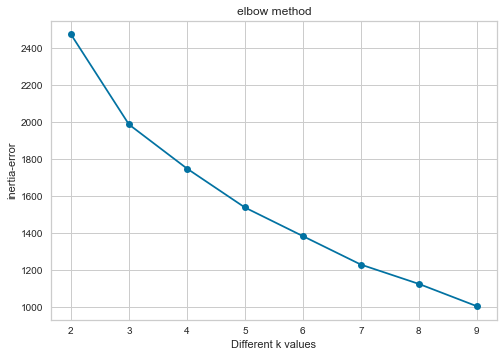

In [103]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [104]:
silhouette_score(dropped_scale, K_means_model.labels_)

0.6130210000012983

In [105]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(dropped_scale)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(dropped_scale, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6130210000012983
For n_clusters=3, the silhouette score is 0.5665325724514059
For n_clusters=4, the silhouette score is 0.3654057459093142
For n_clusters=5, the silhouette score is 0.45159704628561465
For n_clusters=6, the silhouette score is 0.4289299292227299
For n_clusters=7, the silhouette score is 0.4581661806212617
For n_clusters=8, the silhouette score is 0.2643607212673043


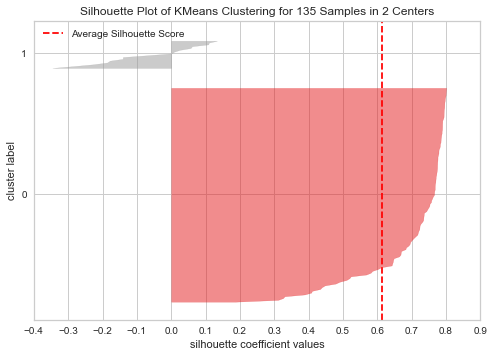

In [106]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(dropped_scale)    # Fit the data to the visualizer
visualizer.poof();

In [107]:
df["labels"] = df2["Military Strength"]

In [108]:
cluster2 = K_means_model.labels_

In [109]:
df["cluster2"] = cluster2

In [110]:
df.sample(25)

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Classes,labels,cluster2
61,1.6,85.0,27.0,0.0,2.0,13.0,40.0,16.0,367.0,745.0,98.0,0.0,27.0,38.0,0.0,0.0,0.0,0.0,6831000000.0,1641971.0,2916467.0,17818.0,499.0,0.0,475.0,1,Kuwait,0
70,0.7,170.0,26.0,13.0,18.0,40.0,65.0,0.0,74.0,1387.0,0.0,211.0,54.0,61.0,0.0,2.0,0.0,6.0,4000000000.0,15201837.0,31809660.0,329847.0,4675.0,7200.0,2742.0,1,Malaysia,0
71,1.9,29.0,9.0,0.0,6.0,5.0,8.0,6.0,80.0,248.0,0.0,50.0,32.0,0.0,0.0,0.0,0.0,0.0,70000000.0,5991557.0,18429893.0,1240192.0,0.0,0.0,7908.0,1,Mali,0
122,0.4,570.0,75.0,19.0,48.0,154.0,307.0,7.0,841.0,1416.0,20.0,776.0,25.0,292.0,1.0,0.0,0.0,7.0,7100000000.0,35543014.0,68615858.0,513120.0,3219.0,4000.0,5673.0,1,Thailand,0
69,3.1,6.0,0.0,0.0,0.0,0.0,6.0,0.0,12.0,103.0,0.0,25.0,0.0,8.0,0.0,0.0,0.0,0.0,115000000.0,10145026.0,25683610.0,587040.0,4828.0,600.0,0.0,1,Madagascar,0
57,0.2,1561.0,279.0,12.0,60.0,427.0,637.0,119.0,1004.0,3130.0,238.0,500.0,99.0,155.0,4.0,20.0,40.0,0.0,49000000000.0,53873803.0,126168156.0,377915.0,29751.0,1770.0,0.0,1,Japan,1
68,1.5,10.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,420.0,56.0,54.0,0.0,12.0,0.0,0.0,0.0,0.0,1107000000.0,1779322.0,2793284.0,65300.0,90.0,441.0,1545.0,1,Lithuania,0
78,2.3,16.0,8.0,0.0,1.0,1.0,6.0,2.0,100.0,335.0,0.0,260.0,12.0,8.0,0.0,0.0,0.0,0.0,245000000.0,4629744.0,27233789.0,799380.0,2470.0,460.0,4783.0,1,Mozambique,0
127,0.4,297.0,48.0,25.0,32.0,76.0,121.0,34.0,2026.0,10135.0,738.0,2040.0,430.0,25.0,0.0,0.0,0.0,1.0,5400000000.0,22195911.0,43952299.0,603550.0,2782.0,2150.0,5618.0,1,Ukraine,0
111,2.4,19.0,0.0,0.0,2.0,0.0,17.0,6.0,110.0,200.0,24.0,0.0,14.0,0.0,2.0,22.0,12.0,18.0,80000000.0,5245155.0,10204581.0,644329.0,0.0,0.0,6018.0,1,South Sudan,0


In [111]:
df.cluster2.value_counts()

0    119
1     16
Name: cluster2, dtype: int64

In [113]:
df[df["cluster2"] == 1]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Classes,labels,cluster2
17,0.2,715.0,43.0,78.0,126.0,198.0,242.0,12.0,437.0,1820.0,132.0,565.0,84.0,112.0,0.0,6.0,0.0,7.0,27800000000.0,107764996.0,208846892.0,8514877.0,7491.0,50000.0,16145.0,1,Brazil,1
35,0.2,1054.0,215.0,88.0,59.0,387.0,294.0,81.0,4295.0,11700.0,1139.0,2189.0,1084.0,316.0,2.0,8.0,0.0,7.0,11200000000.0,42946553.0,99413317.0,1001450.0,2450.0,3500.0,2612.0,1,Egypt,1
40,0.2,1229.0,269.0,0.0,121.0,187.0,589.0,62.0,528.0,6028.0,109.0,12.0,13.0,180.0,4.0,9.0,11.0,11.0,41500000000.0,30111868.0,67364357.0,643801.0,4853.0,8501.0,4072.0,1,France,1
43,0.2,712.0,128.0,74.0,71.0,26.0,386.0,56.0,245.0,4583.0,108.0,0.0,38.0,80.0,0.0,6.0,0.0,9.0,50000000000.0,37010559.0,80457737.0,357022.0,2389.0,7467.0,3694.0,1,Germany,1
49,0.1,2123.0,538.0,172.0,250.0,359.0,722.0,23.0,4292.0,8686.0,235.0,4060.0,266.0,285.0,1.0,16.0,10.0,13.0,61000000000.0,622480340.0,1296834042.0,3287263.0,7000.0,14500.0,13888.0,0,India,1
51,0.2,509.0,155.0,23.0,62.0,94.0,100.0,12.0,2056.0,4300.0,570.0,2088.0,1935.0,398.0,0.0,34.0,0.0,7.0,19600000000.0,47324105.0,83024745.0,1648195.0,2440.0,850.0,5894.0,1,Iran,1
54,0.3,589.0,259.0,18.0,15.0,154.0,146.0,48.0,2760.0,10275.0,650.0,300.0,100.0,65.0,0.0,5.0,0.0,0.0,20000000000.0,3647983.0,8424904.0,20770.0,273.0,0.0,1068.0,1,Israel,1
55,0.2,860.0,99.0,110.0,38.0,185.0,439.0,59.0,200.0,6947.0,54.0,108.0,21.0,249.0,2.0,8.0,4.0,12.0,27800000000.0,28011003.0,62246674.0,301340.0,7600.0,2400.0,1836.0,1,Italy,1
57,0.2,1561.0,279.0,12.0,60.0,427.0,637.0,119.0,1004.0,3130.0,238.0,500.0,99.0,155.0,4.0,20.0,40.0,0.0,49000000000.0,53873803.0,126168156.0,377915.0,29751.0,1770.0,0.0,1,Japan,1
87,0.4,949.0,458.0,114.0,4.0,169.0,204.0,20.0,6045.0,10000.0,800.0,1000.0,2110.0,984.0,0.0,83.0,0.0,11.0,1600000000.0,13045878.0,25381085.0,120538.0,2495.0,2250.0,1607.0,1,North Korea,1


In [116]:
df.drop(columns="labels",axis=1,inplace=True)

### Evaluate 

In [ ]:
# USA, Russia, China dışında 2 cluster oluşturdum. 
# Çünkü bu ülkelerin donanma gücü Outlier seviyesinde idi 
# Bunları düşürdükten sonra model daha uygun bir kümeleme yaptı. 
# Totalde 3 cluster ile modellemeyi tamamladım.

## Hierarchical Clustering

In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [117]:
hc_ward = linkage(y = df, method = "ward")
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

### Model Building and label visualisation

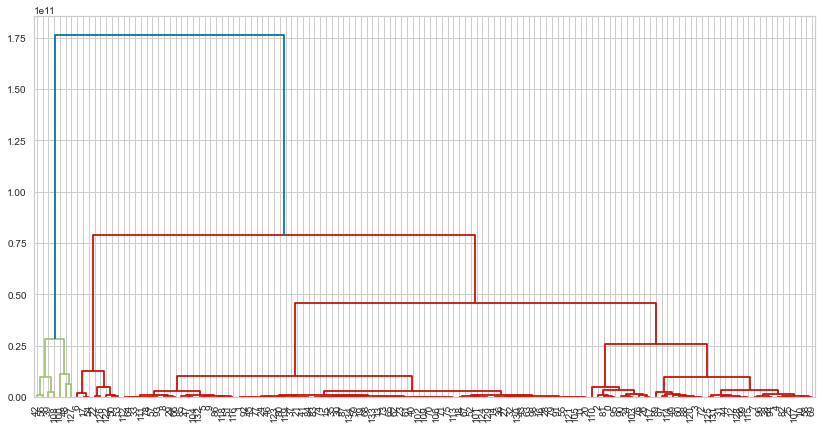

In [118]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

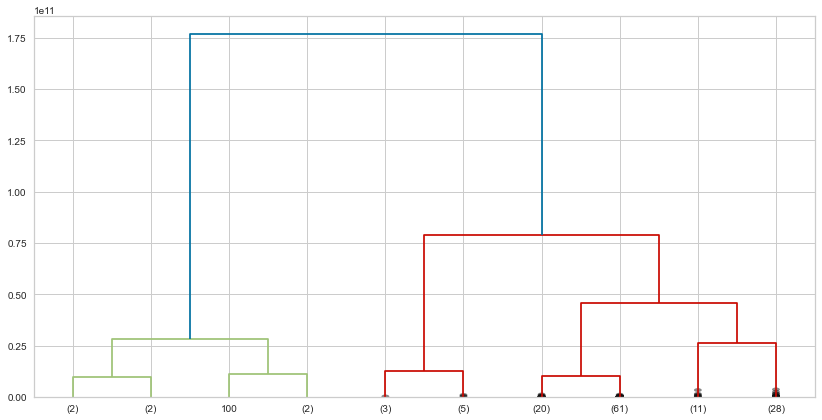

In [119]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);
           # çizginin kendisinide küme sayıyoruz.

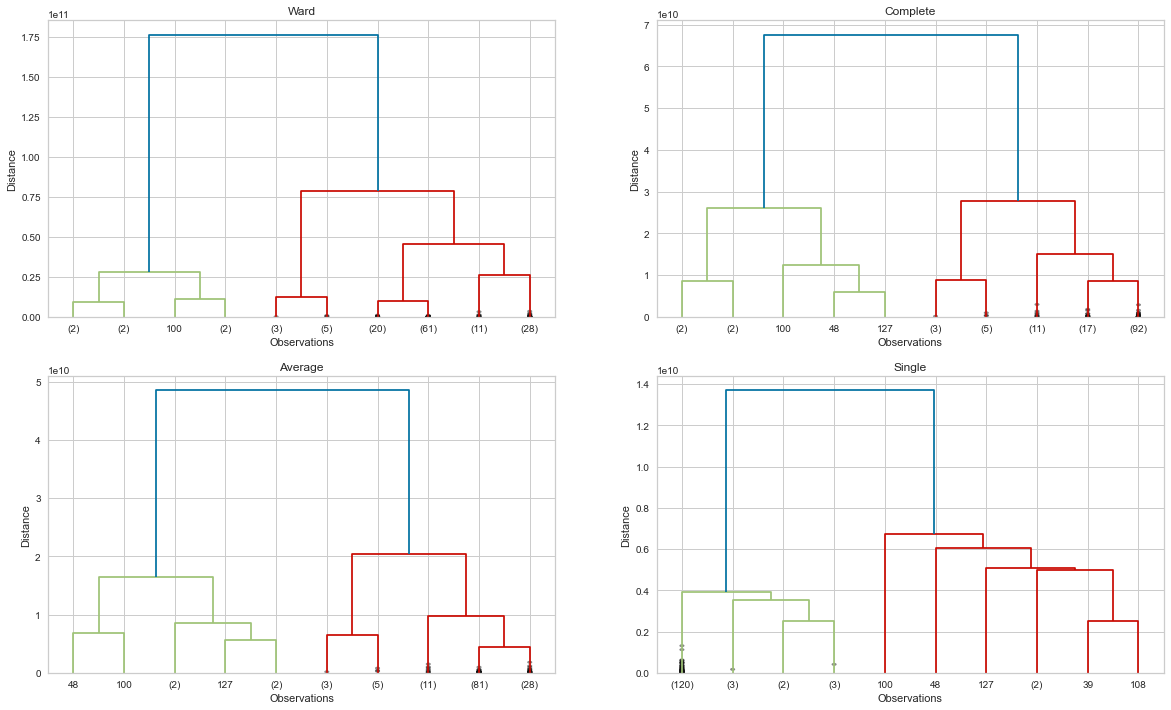

In [120]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [121]:
from sklearn.cluster import AgglomerativeClustering

In [122]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')
    # Görseller 3 dedi. Skor 2 diyor. Datanın kalitesini bozan bir durum mu var? 

Silhouette Score for 2 clusters: 0.8615514943845346
Silhouette Score for 3 clusters: 0.7805138096976302
Silhouette Score for 4 clusters: 0.6624660388068976
Silhouette Score for 5 clusters: 0.658492879743367
Silhouette Score for 6 clusters: 0.6890454116483251
Silhouette Score for 7 clusters: 0.6942248480539228
Silhouette Score for 8 clusters: 0.6866602508158952
Silhouette Score for 9 clusters: 0.6359300435496555
Silhouette Score for 10 clusters: 0.6390566776582915


In [124]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(df)
df["cluster"] = clusters

In [126]:
df.cluster.value_counts()

0    120
2      8
1      7
Name: cluster, dtype: int64

In [128]:
df3 = df.iloc[:, [0,1,3]]
df3.head()

,Military Strength Power Index,Aircraft Strength value,Attack Aircraft Strength value
0,1.3,260.0,25.0
1,2.3,19.0,0.0
2,0.5,551.0,22.0
3,0.8,295.0,18.0
4,0.7,227.0,7.0


In [129]:
hopkins(df3, df3.shape[0])

0.15771515004062772

In [130]:
hc_ward = linkage(y = df3, method = "ward")
hc_complete = linkage(df3, "complete")
hc_average = linkage(df3, "average")
hc_single = linkage(df3, "single")

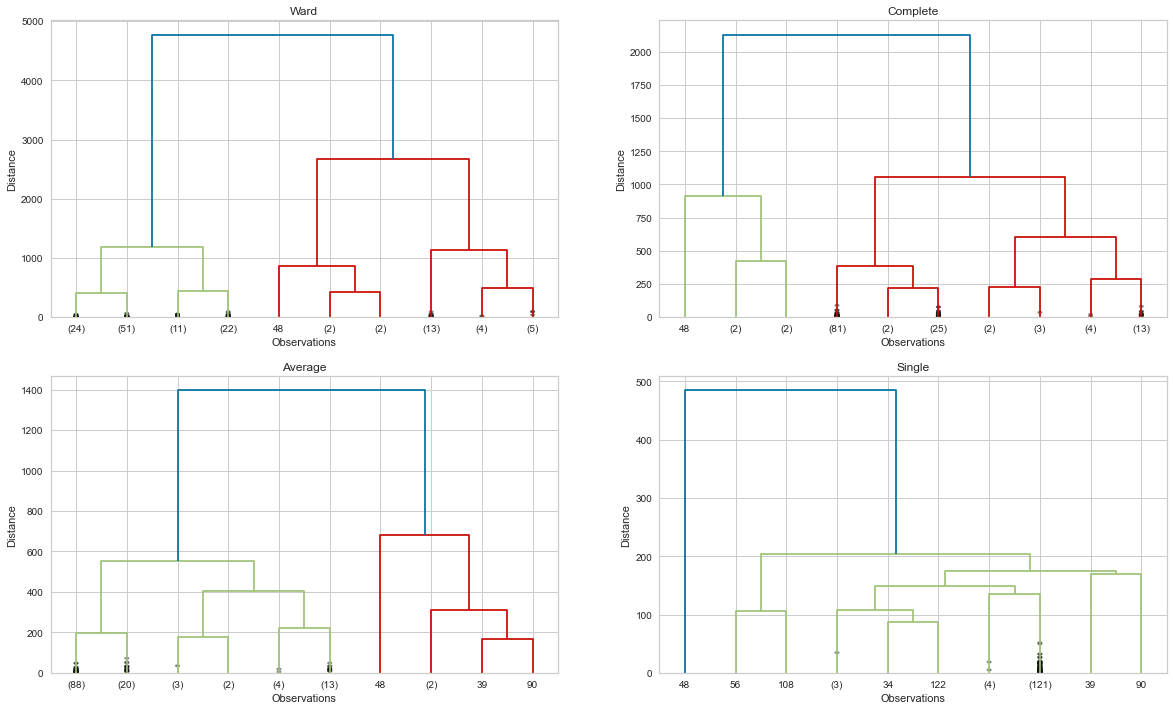

In [131]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [132]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.6557719069940019
Silhouette Score for 3 clusters: 0.6201021687175329
Silhouette Score for 4 clusters: 0.2706518165645621
Silhouette Score for 5 clusters: 0.2657543443209343
Silhouette Score for 6 clusters: 0.2516987665038559
Silhouette Score for 7 clusters: 0.24957565475398596
Silhouette Score for 8 clusters: 0.2094500344310282
Silhouette Score for 9 clusters: 0.20804537208821153
Silhouette Score for 10 clusters: 0.05488733402119351


In [133]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = final_model.fit_predict(df3)
df3["cluster_last"] = clusters

In [134]:
df3.cluster_last.value_counts()

0    108
1     22
2      5
Name: cluster_last, dtype: int64

In [136]:
df3["Military_level"] = df3["cluster_last"].map({0:"low", 1:"middle",2:"big"}) # USA; China and Russia very big.

In [139]:
df3["Country"] = df2["Military Strength"]
df3

,Military Strength Power Index,Aircraft Strength value,Attack Aircraft Strength value,cluster_last,Military_level,States,Country
0,1.3,260.0,25.0,0,low,Afghanistan,Afghanistan
1,2.3,19.0,0.0,0,low,Albania,Albania
2,0.5,551.0,22.0,1,middle,Algeria,Algeria
3,0.8,295.0,18.0,0,low,Angola,Angola
4,0.7,227.0,7.0,0,low,Argentina,Argentina
5,2.1,64.0,9.0,0,low,Armenia,Armenia
6,0.3,464.0,6.0,1,middle,Australia,Australia
7,1.0,120.0,0.0,0,low,Austria,Austria
8,0.9,147.0,12.0,0,low,Azerbaijan,Azerbaijan
9,1.9,109.0,0.0,0,low,Bahrain,Bahrain


In [141]:
df3[df3.Military_level=="big"]["Country"]

40          France
49           India
57           Japan
91        Pakistan
110    South Korea
Name: Country, dtype: object